In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-76.40882714268676 167.92291014133275
-16.55895867304112 -57.71754479906748
13.169243754669736 -134.95103641411376
4.248207542204071 77.34058223420055
-0.608363576101226 -64.05607452139876
1.4344485205948132 122.33285372228431
44.033491629873765 16.391189093333537
48.440246038294845 -165.30154583175687
73.33666535632926 32.62604546303541
-14.312350032925437 11.76062618217054
-44.119371222571104 130.66194519472936
73.31451589283944 -53.786873132294346
-51.30197305943488 158.6832907543722
76.68813544225233 152.41776074463155
32.445295740569875 146.50301953483665
-73.47295436441536 -108.04486063449386
-85.06145506514395 -139.25472734168002
-26.607348607498594 21.678740313215542
0.34758433205762174 -152.47300662666177
-63.039052615159164 130.6178774937456
87.90169741137314 -32.14067803013904
-3.3747057360148744 -164.08466551686658
33.45434144411804 113.4050930298784
-60.07982234408667 154.23723392508344
3.113171419502436 -103.21242895727724
-77.28201267547017 -117.51291049825501
10.5294212

-28.787022295941597 99.83842372080375
18.510048419782564 72.79819543074552
59.06073161713303 16.25455048593949
-49.47177810503366 -77.02384774337285
-18.217319665118367 81.07123014688574
27.016209766685094 -104.60035095770363
-10.236461725782718 -20.87766908059473
29.83170704182919 -81.2653137539625
44.58073208510771 -109.28827817966884
36.45110701077401 -53.34237661706719
43.22558394408418 97.3892961805243
19.627699009041734 65.6308681984085
-13.593932082223688 -78.08006145479865
42.58301935644627 32.81943089359112
57.13644069073098 -15.40472582588319
-23.468776627513307 -18.660845750829424
-75.325302330238 -145.4388987296466
59.87858307224039 -142.40639349343084
-87.23266638731712 -73.12818849853105
-39.95717796390141 -46.36810487508515
-49.48099178761746 -5.454746330934626
41.23859648008124 115.66863120317407
-55.37483496526035 -87.11913094939396
86.47960092995888 157.8608768407928
-43.91894091298601 153.36522491619422
-49.81177306465605 -64.00910668122329
-3.9718065114480368 -108.6

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

660

In [6]:
import requests
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | caceres
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | galle
Processing Record 5 of Set 1 | santa isabel do rio negro
Processing Record 6 of Set 1 | gorontalo
Processing Record 7 of Set 1 | bosansko grahovo
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | vardo
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tsabong
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 1 | sam

Processing Record 37 of Set 4 | mineros
Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | tupancireta
Processing Record 43 of Set 4 | caala
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | qaanaaq
Processing Record 47 of Set 4 | potsdam
Processing Record 48 of Set 4 | port keats
Processing Record 49 of Set 4 | nevelsk
Processing Record 50 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 1 of Set 5 | san quintin
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | salalah
Processing Record 4 of Set 5 | keller
Processing Record 5 of Set 5 | meulaboh
Processing Record 6 of Set 5 | miles city
Processing Record 7 of Set 5 | soyo
Processing Record 8 of Set 5 | ust-uda
Processing Record 9 of Set 5 | metsovon
City not found. Skipping...
Proce

Processing Record 26 of Set 8 | buon me thuot
City not found. Skipping...
Processing Record 27 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 8 | klaksvik
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | moose factory
Processing Record 31 of Set 8 | alamos
Processing Record 32 of Set 8 | ilulissat
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | laramie
Processing Record 35 of Set 8 | rangapara
Processing Record 36 of Set 8 | gouyave
Processing Record 37 of Set 8 | portland
Processing Record 38 of Set 8 | swan hill
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | cabo san lucas
Processing Record 41 of Set 8 | burnie
Processing Record 42 of Set 8 | sur
Processing Record 43 of Set 8 | raciborz
Processing Record 44 of Set 8 | leicester
Processing Record 45 of Set 8 | tapaua
City not found. Skipping...
Processing Record 46 of Set 8 | santa cruz del norte
Processing Record 47 of Set 8 | vestm

Processing Record 13 of Set 12 | louga
Processing Record 14 of Set 12 | taunggyi
Processing Record 15 of Set 12 | norilsk
Processing Record 16 of Set 12 | bhitarwar
Processing Record 17 of Set 12 | salihorsk
Processing Record 18 of Set 12 | ballina
Processing Record 19 of Set 12 | imbituba
Processing Record 20 of Set 12 | otukpo
Processing Record 21 of Set 12 | revadanda
Processing Record 22 of Set 12 | katrineholm
Processing Record 23 of Set 12 | coihaique
Processing Record 24 of Set 12 | valle de allende
Processing Record 25 of Set 12 | saint augustine
Processing Record 26 of Set 12 | cody
Processing Record 27 of Set 12 | saint-pierre
Processing Record 28 of Set 12 | yumen
Processing Record 29 of Set 12 | dwarka
Processing Record 30 of Set 12 | chilca
Processing Record 31 of Set 12 | safranbolu
Processing Record 32 of Set 12 | xuanhua
Processing Record 33 of Set 12 | comodoro rivadavia
Processing Record 34 of Set 12 | homestead
Processing Record 35 of Set 12 | hualmay
Processing Reco

In [8]:
len(city_data)

603

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,35.80,75,76,16.69,NZ,2022-07-15 20:59:26
1,Caceres,39.5220,-6.3748,91.26,18,100,8.95,ES,2022-07-15 20:59:26
2,Hilo,19.7297,-155.0900,92.28,86,45,5.99,US,2022-07-15 20:59:27
3,Galle,6.0367,80.2170,77.95,87,85,10.69,LK,2022-07-15 20:59:27
4,Santa Isabel Do Rio Negro,-0.4139,-65.0192,77.09,88,97,2.77,BR,2022-07-15 20:59:27
5,Gorontalo,0.5412,123.0595,74.68,95,100,4.59,ID,2022-07-15 20:59:28
6,Bosansko Grahovo,44.1794,16.3639,63.73,70,0,5.97,BA,2022-07-15 20:59:28
7,Bethel,41.3712,-73.4140,86.54,50,50,1.01,US,2022-07-15 20:59:29
8,Vardo,70.3705,31.1107,57.18,82,0,2.30,NO,2022-07-15 20:59:29
9,Namibe,-15.1961,12.1522,65.68,94,30,3.58,AO,2022-07-15 20:59:29


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-15 20:59:26,-46.6000,168.3333,35.80,75,76,16.69
1,Caceres,ES,2022-07-15 20:59:26,39.5220,-6.3748,91.26,18,100,8.95
2,Hilo,US,2022-07-15 20:59:27,19.7297,-155.0900,92.28,86,45,5.99
3,Galle,LK,2022-07-15 20:59:27,6.0367,80.2170,77.95,87,85,10.69
4,Santa Isabel Do Rio Negro,BR,2022-07-15 20:59:27,-0.4139,-65.0192,77.09,88,97,2.77
5,Gorontalo,ID,2022-07-15 20:59:28,0.5412,123.0595,74.68,95,100,4.59
6,Bosansko Grahovo,BA,2022-07-15 20:59:28,44.1794,16.3639,63.73,70,0,5.97
7,Bethel,US,2022-07-15 20:59:29,41.3712,-73.4140,86.54,50,50,1.01
8,Vardo,NO,2022-07-15 20:59:29,70.3705,31.1107,57.18,82,0,2.30
9,Namibe,AO,2022-07-15 20:59:29,-15.1961,12.1522,65.68,94,30,3.58


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

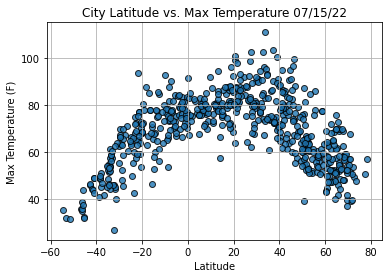

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

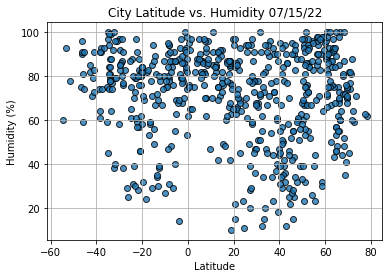

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

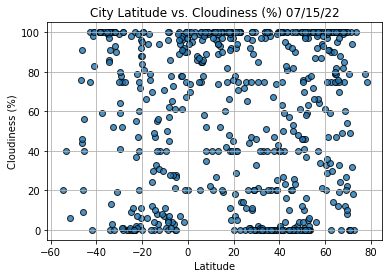

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

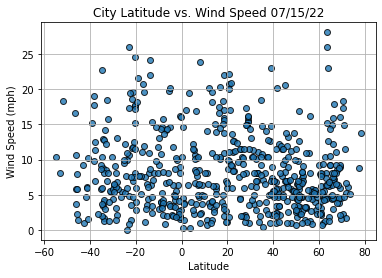

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
from scipy.stats import linregress

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Text coordinates is where the equation gets printed
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                   Chokurdakh
Country                        RU
Date          2022-07-15 20:59:31
Lat                       70.6333
Lng                      147.9167
Max Temp                    51.24
Humidity                       74
Cloudiness                     49
Wind Speed                  18.28
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Caceres,ES,2022-07-15 20:59:26,39.5220,-6.3748,91.26,18,100,8.95
2,Hilo,US,2022-07-15 20:59:27,19.7297,-155.0900,92.28,86,45,5.99
3,Galle,LK,2022-07-15 20:59:27,6.0367,80.2170,77.95,87,85,10.69
5,Gorontalo,ID,2022-07-15 20:59:28,0.5412,123.0595,74.68,95,100,4.59
6,Bosansko Grahovo,BA,2022-07-15 20:59:28,44.1794,16.3639,63.73,70,0,5.97


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Caceres,ES,2022-07-15 20:59:26,39.5220,-6.3748,91.26,18,100,8.95
2,Hilo,US,2022-07-15 20:59:27,19.7297,-155.0900,92.28,86,45,5.99
3,Galle,LK,2022-07-15 20:59:27,6.0367,80.2170,77.95,87,85,10.69
5,Gorontalo,ID,2022-07-15 20:59:28,0.5412,123.0595,74.68,95,100,4.59
6,Bosansko Grahovo,BA,2022-07-15 20:59:28,44.1794,16.3639,63.73,70,0,5.97


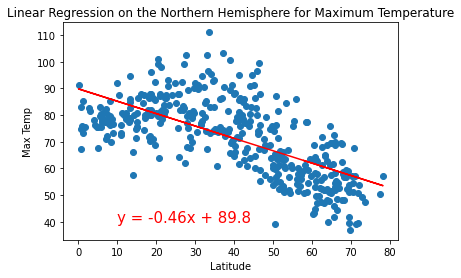

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

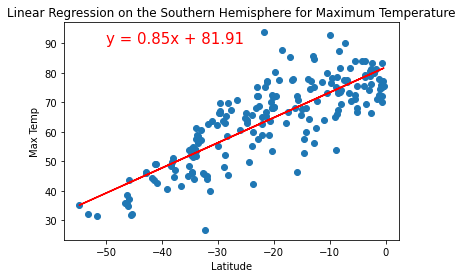

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

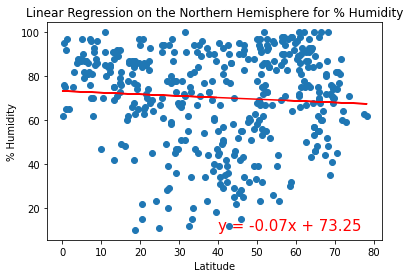

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

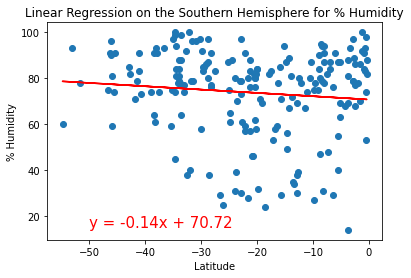

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

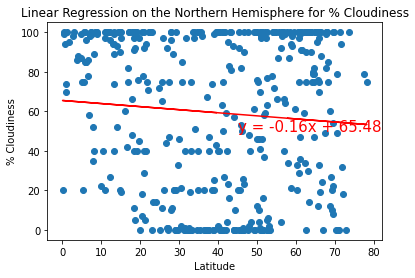

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,50))

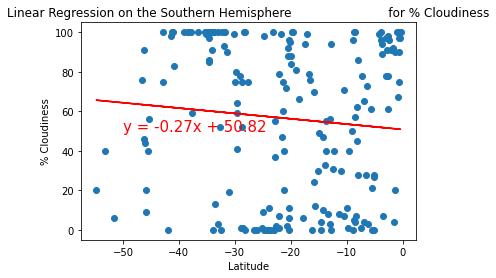

In [26]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,50))


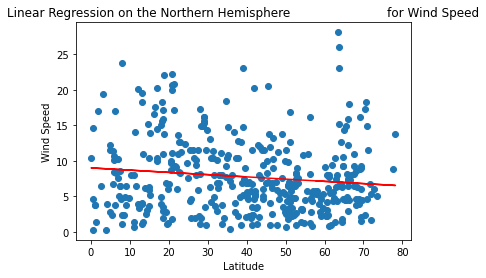

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

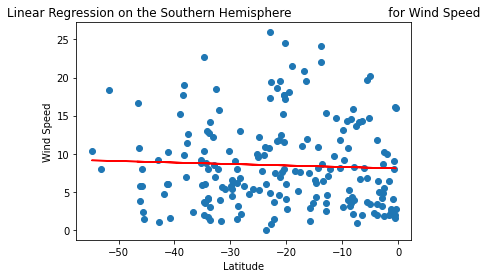

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
